# Artificial Intelligence
# 464/664
# Assignment #4

## General Directions

0. We're using a Jupyter Notebook environment (tutorial available here: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html),
1. Read the entire notebook before beginning your work, 
2. Output format should be exactly as requested, 
3. Use descriptive variable names,
4. Functions should do only one thing,
5. Check submission deadline on Gradescope, and
6. Submit your notebook using Gradescope.

## Game Theory

In this assignment, we're designing an experiment where two players employ the *Best Response with Inertia* algorithm against each other.

## Best Response with Inertia Algorithm

Here is the outline of the algorithm for each player:


```
On day zero, play a random action

On day t, do one of two things:

    * With high probability, play the best response to what your opponent did yesterday, or
    * With low probability, be lazy and just do what you did yesterday.
```

## Game

The particular 2x2 game being played is the Stag-Hunt game, with the matrix:


|  | | |
|---|---|---|
|  | S | H |
| S | 3, 3 | 0, 2 |
| H | 2, 0 | 2, 2 |


Player 1 (P1) is the `row` player; Player 2 (P2) is the `col` player.

In [1]:
import random

In [2]:
# The actions available to each player
actions_P1 = ['S', 'H']
actions_P2 = ['S', 'H']

# Store the history
history_P1_action, history_P1_utility = [], []
history_P2_action, history_P2_utility = [], []

<a id="get_utility"></a>
## get_utility

This function takes a joint action tuple and returns the utility for each player, packaged as a tuple. It is harcoded for the Stag-Hunt game described above.

* **a** Tuple: joint action. a could be ('S', 'H'), for instance, which would signify that P1 has chosen to do 'S' and P2 has chosen to do 'H'.


**returns** 

* **utility** Tuple: the utility for each player as (utility of P1, utility of P2). For example, if the joint action is ('S', 'H'), the returned value is (0, 2) -- 0 for P1, 2 for P2. 

In [3]:
def get_utility(a):
    if a[0] == 'S' and a[1] == 'S':
        return (3, 3)
    elif a[0] == 'S' and a[1] == 'H':
        return (0, 2)
    elif a[0] == 'H' and a[1] == 'S':
        return (2, 0)
    elif a[0] == 'H' and a[1] == 'H':
        return (2, 2)

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <p>
        TODO: Help players pick actions based on the <i>Best Response with inertia</i> algorithm, described above (instead of just picking 'S' like they are now). 
    </p>
</div>

<a id="calculate_action"></a>
## calculate_action
This function determines the player's next action. It utilizes the history of the players previous reponses, and the opponent's previous reponses. 

* **history_P1_action** List: A List containing the previous actions of P1
* **history_P2_action** List: A List containing the previous actions of P2
* **is_P1** Bool: Is the current player P1
* **percent_chance_of_lazy** Int: percent chance that a player will lazily decide to choose their previous action. By default this is set to 1%.

**returns** String: Action the Player will Take, either "S" or "H" representing the choice to hunt Stag or Hare/Bunny-Rabbit

In [4]:
def calculate_action(history_P1_action, history_P2_action, is_P1: bool, percent_chance_of_lazy: int=1):
    protagonist_history = history_P1_action if is_P1 else history_P2_action
    opponent_history =    history_P2_action if is_P1 else history_P1_action
    if len(protagonist_history) == 0: 
        random_action = "S" if random.randint(1, 2) == 1 else "H"
        protagonist_history.append(random_action)
        return random_action
    if random.randint(1, 100) in set(range(1, percent_chance_of_lazy+1)):   
        protagonist_previous_move = protagonist_history[-1]
        protagonist_history.append(protagonist_previous_move)
        return protagonist_previous_move
    else:
        opponents_previous_move = opponent_history[-1]
        best_reponse_to: dict = {"S": "S", "H": "H"}
        protagonist_history.append(best_reponse_to[opponents_previous_move])
        return best_reponse_to[opponents_previous_move]


<a id="run_experiment"></a>
## run_experiment

This functions runs an experiment where two players play the Stag-Hunt game using the Best Response with Inertia algorithm.

* **num_trials** Int: The number of trials to run
* **num_days** Int: The number of days in each trial
* **debug** Bool: If set to True, statements are printed out


**returns** 

None

In [5]:
def run_experiment(num_trials, num_days, debug=True):
    if debug: print(f"Trial\tDay\tP1\tP2\n--------------------------")    
    for trial in range(num_trials):  
        if debug: print(f"--------------------------")
        history_P1_Temp = [] # DONE.
        history_P2_Temp = [] # DONE.
        for day in range(num_days):
            action_P1 = calculate_action(history_P1_Temp, history_P2_Temp, (True))  # DONE.
            action_P2 = calculate_action(history_P1_Temp, history_P2_Temp, (False)) # DONE.
            utility_P1, utility_P2 = get_utility(tuple((action_P1, action_P2)))
            history_P1_action.append(action_P1)
            history_P2_action.append(action_P2)
            history_P1_utility.append(utility_P1)
            history_P2_utility.append(utility_P2)
            if debug: print(f"{trial}\t{day}\t{action_P1}\t{action_P2}")
        

In [6]:
# Parameters
run_experiment(num_trials=20, num_days=10, debug=True)

Trial	Day	P1	P2
--------------------------
--------------------------
0	0	S	S
0	1	S	S
0	2	S	S
0	3	S	S
0	4	S	S
0	5	S	S
0	6	S	S
0	7	S	S
0	8	S	S
0	9	S	S
--------------------------
1	0	H	S
1	1	S	S
1	2	S	S
1	3	S	S
1	4	S	S
1	5	S	S
1	6	S	S
1	7	S	S
1	8	S	S
1	9	S	S
--------------------------
2	0	H	S
2	1	S	S
2	2	S	S
2	3	S	S
2	4	S	S
2	5	S	S
2	6	S	S
2	7	S	S
2	8	S	S
2	9	S	S
--------------------------
3	0	H	S
3	1	S	S
3	2	S	S
3	3	S	S
3	4	S	S
3	5	S	S
3	6	S	S
3	7	S	S
3	8	S	S
3	9	S	S
--------------------------
4	0	S	S
4	1	S	S
4	2	S	S
4	3	S	S
4	4	S	S
4	5	S	S
4	6	S	S
4	7	S	S
4	8	S	S
4	9	S	S
--------------------------
5	0	S	H
5	1	H	H
5	2	H	H
5	3	H	H
5	4	H	H
5	5	H	H
5	6	H	H
5	7	H	H
5	8	H	H
5	9	H	H
--------------------------
6	0	H	H
6	1	H	H
6	2	H	H
6	3	H	H
6	4	H	H
6	5	H	H
6	6	H	H
6	7	H	H
6	8	H	H
6	9	H	H
--------------------------
7	0	H	H
7	1	H	H
7	2	H	H
7	3	H	H
7	4	H	H
7	5	H	H
7	6	H	H
7	7	H	H
7	8	H	H
7	9	H	H
--------------------------
8	0	S	S
8	1	S	S
8	2	S	S
8	3	S	S
8	4	S	S
8	5	S	S
8	6	S	S
8	7	S	S
8	8	S	S
8	

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <p>
        TODO: We're looking for a plot that tells us in which cell(s) in our original Stag-Hunt matrix the agents tend to spend most of their time. Use your favorite visualization method (histogram, heat map, or any other appropriate plot). Another way of looking at this is: we want to visualize the joint action across all days and trials. Using your plot, complete the table below.
    </p>
</div>

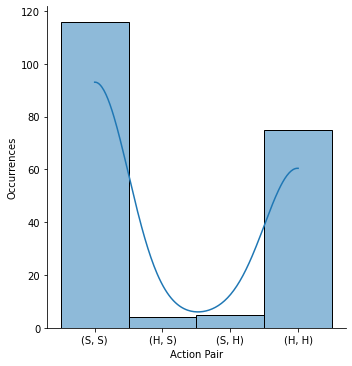

In [7]:
# Visualization code goes here
import seaborn as sns
action_pairs = [f"({history_P1_action[i]}, {history_P2_action[i]})"for i in range(len(history_P1_action))]
utility_pairs = [f"({history_P1_utility[i]}, {history_P2_utility[i]})"for i in range(len(history_P2_utility))]
plt = sns.displot(data=action_pairs, bins=4, kde=True);
plt.set_axis_labels("Action Pair", "Occurrences");

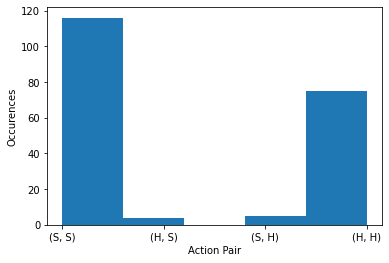

In [8]:
# Alternate Version using Matplotlib instead of Seaborn
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42);
x = np.random.normal(size=1000);
plt.ylabel('Occurences');
plt.xlabel('Action Pair');
plt.hist(action_pairs, density=False, bins=5);

| Question | Comment | 
|------|------|
|Where do agents get stuck? | Agents often get stuck choosing (S, S) or (H, H). One common scenario is (S, S), meaning both players cooperate and hunt the Stag as a team. The other common scenario is (H, H), meaning they both defect and choose to hunt Hares/Bunny-Rabbits individually.  <br/> <br> A player chooses a random action, H or S, on Day 0. As a result, sometimes the resulting action is  ALL (S, S) or  ALL (H, H). This is because if the first choice was (S, S), then agents will NEVER "switch" choices and will continue to play (S, S), and vice versa for (H, H).  <br/> <br/> In other scenarios, sometimes the resulting action includes (S, H) and/or (H, S) for a little while, before either settling with (S, S) OR (H, H) for the vast majority of games. <br/> <br/> This makes sense intuitively because the algorithm rewards mutual cooperation (both players get utility of 3) and mutual defection (both players get utility of 2). Thus, by random chance, when a player finally "lazily" chooses their previous action (low probability), it will finally "match" the opponents action. This results in either (S, S) or (H, H). Then both players will (high probability) choose the best response to that previous game, which will be the same pair of actions. This breaks the cycle of "(S, H), (H, S), (S, H), (H, S), (S, H), (H, S) etc." and shows why agents get stuck choosing ALL (S, S) or ALL (H, H) the majority of the time, and (S, H) and (H, S) a minority of the time.

## Before You Submit...

1. ✅Change the file name to add your name (Last_First_assignment_4),
2. ✅Re-read the general instructions provided above, 
3. ✅Hit "Kernel"->"Restart & Run All", 
4. ✅Submit your notebook using Gradescope, and
5. ✅Do not submit any other files.